## Exploration des données boursière BOEING (30/03/23 au 15/05/24)

In [30]:
import pandas
import matplotlib.pyplot as plt

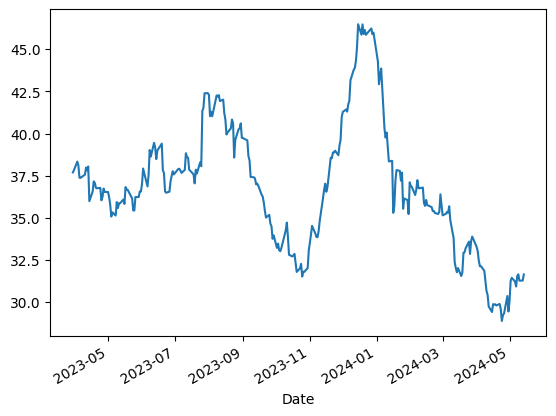

In [9]:
ba_ne = pandas.read_csv('BA.NE.csv', index_col='Date', parse_dates=True)
ba_ne
ba_ne = ba_ne['Close']
ba_ne.plot();

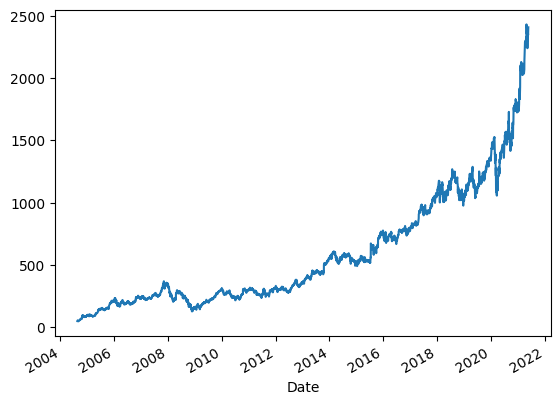

In [12]:
goog = pandas.read_csv('GOOG.csv', index_col='Date', parse_dates=True)

goog = goog['Close']
goog.plot();

<Axes: xlabel='Date'>

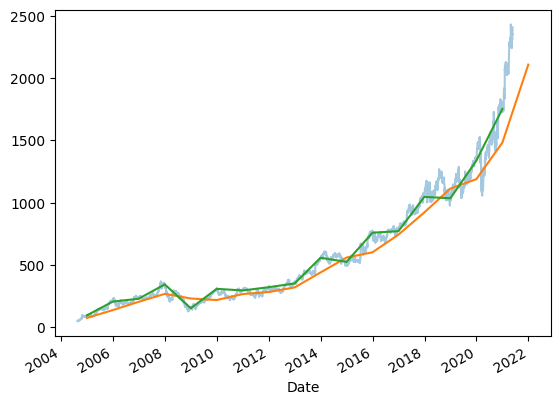

In [28]:
goog.plot(alpha=0.4)
goog.resample('BYE').mean().plot()
goog.asfreq('BYE').plot()

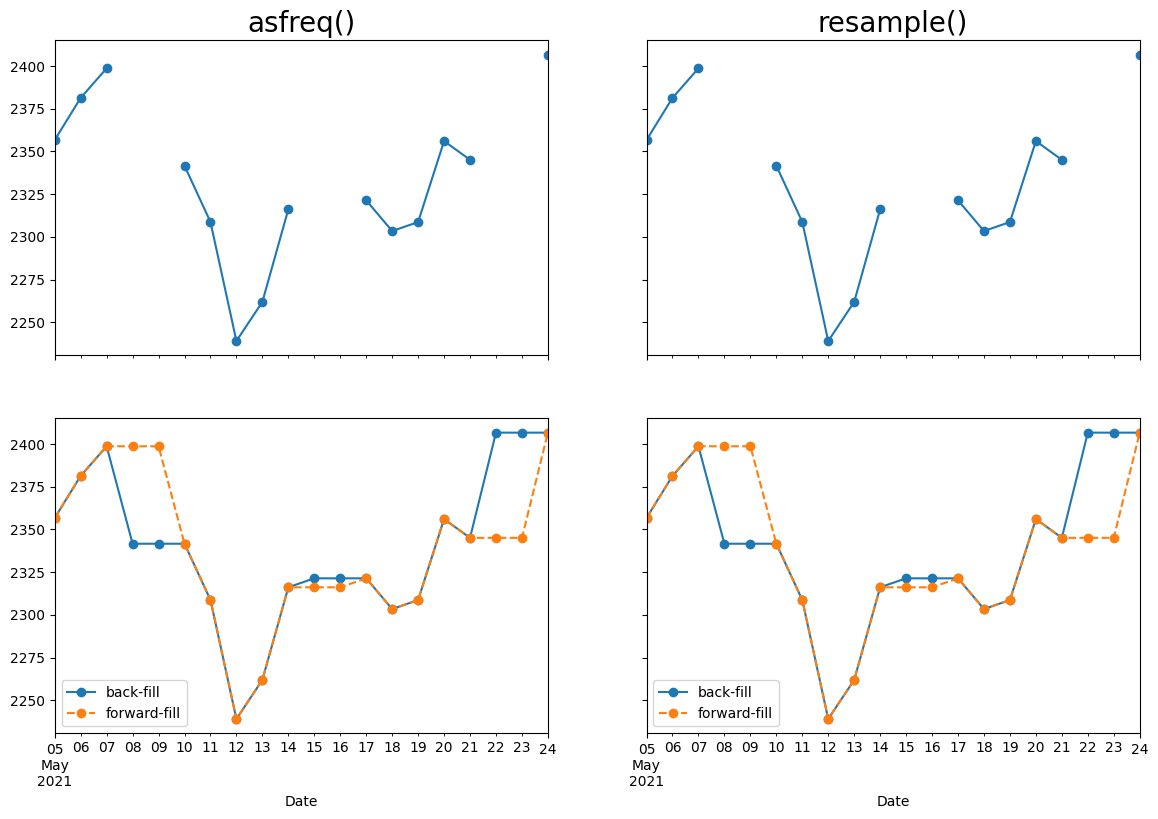

In [31]:
data = goog.iloc[-14:]

#visualisation
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(14,9))

#avec asfreq
data.asfreq('D').plot(ax=ax[0,0], marker='o')
ax[0,0].set_title("asfreq()", fontsize=20)

data.asfreq('D', method='bfill').plot(ax=ax[1,0], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1,0], style='--o')
ax[1,0].legend(["back-fill", "forward-fill"])

#avec resample
data.resample('D').mean().plot(ax=ax[0,1], marker='o')
ax[0,1].set_title("resample()", fontsize=20)

data.resample('D').bfill().plot(ax=ax[1,1], style='-o')
data.resample('D').ffill().plot(ax=ax[1,1], style='--o')
ax[1,1].legend(["back-fill", "forward-fill"])

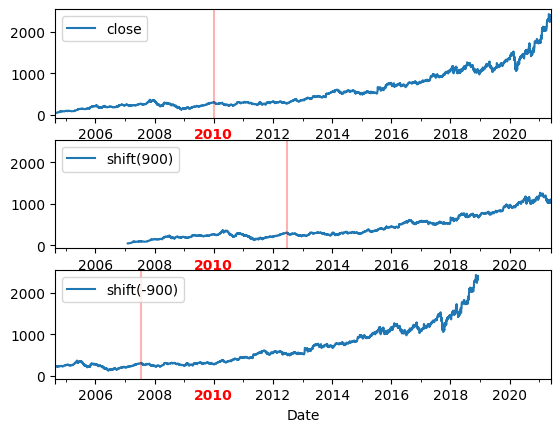

In [32]:
fig, ax = plt.subplots(3, sharey=True)

goog = goog.asfreq('D', method='ffill')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.shift(-900).plot(ax=ax[2])

local_max = pandas.to_datetime('2010-01-01')
offset1 = pandas.Timedelta(900, 'D')
offset2 = pandas.Timedelta(-900, 'D')

ax[0].legend(['close'], loc=2)
ax[0].get_xticklabels()[3].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[3].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset1, alpha=0.3, color='red')

ax[2].legend(['shift(-900)'], loc=2)
ax[2].get_xticklabels()[3].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset2, alpha=0.3, color='red')

Text(0, 0.5, 'ROI')

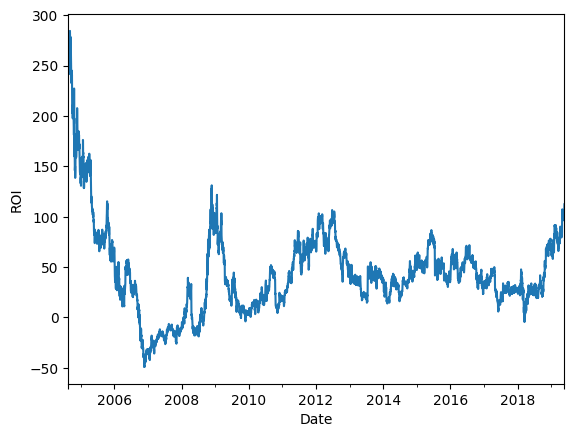

In [34]:
ROI_1 = 100 * (goog.shift(-730) / goog - 1)
ROI_1.iloc[:-730].plot()
plt.ylabel('ROI')


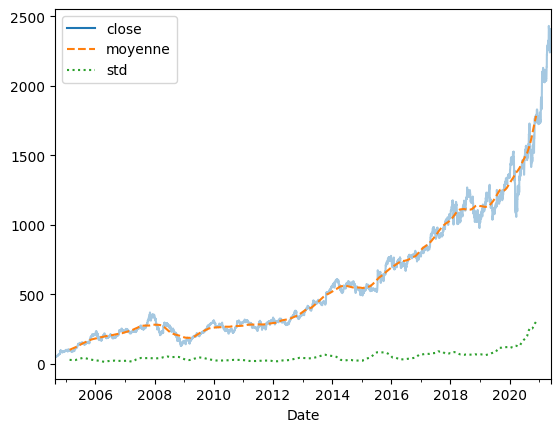

In [35]:
rol = goog.rolling(365, center=True)

data = pandas.DataFrame({'close': goog,
                    'moyenne': rol.mean(),
                    'std': rol.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.4)

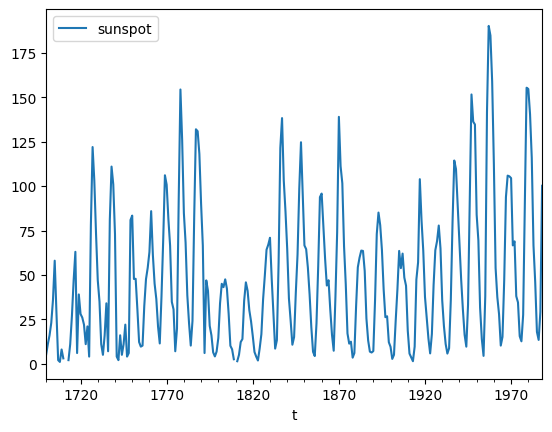

In [16]:
sunspot = pandas.read_csv('sunspot.csv', index_col='t', parse_dates=True)
sunspot.plot();


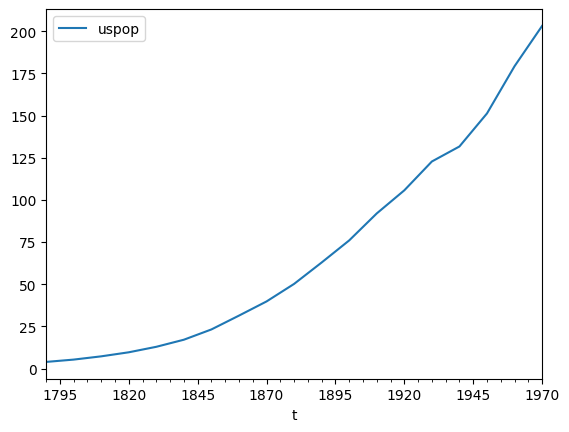

In [20]:
uspop = pandas.read_csv('uspop.csv', index_col='t', parse_dates=True)
uspop.plot();

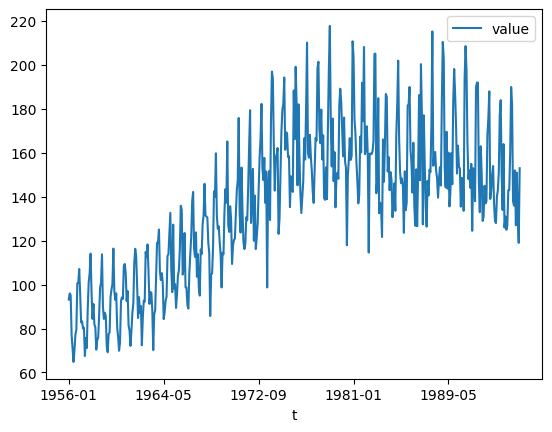

In [26]:
beer = pandas.read_csv('beer.csv', index_col='t')
beer.plot();